In [2]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, names=columns)

# Drop the target column for unsupervised clustering
df = data.drop('class', axis=1)
print("Dataset Head:")
print(df.head())


Dataset Head:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


No preprocessing


In [4]:
df_no_processing = df.copy()


Normalization

In [5]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Normalized Data:")
print(df_normalized.head())


Normalized Data:
   sepal_length  sepal_width  petal_length  petal_width
0      0.222222     0.625000      0.067797     0.041667
1      0.166667     0.416667      0.067797     0.041667
2      0.111111     0.500000      0.050847     0.041667
3      0.083333     0.458333      0.084746     0.041667
4      0.194444     0.666667      0.067797     0.041667


PCA

In [6]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2'])
print("PCA Transformed Data:")
print(df_pca.head())


PCA Transformed Data:
        PC1       PC2
0 -2.684207  0.326607
1 -2.715391 -0.169557
2 -2.889820 -0.137346
3 -2.746437 -0.311124
4 -2.728593  0.333925


Normalise + PCA

In [7]:
# Normalize and Apply PCA
df_normalized_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2'])
print("Normalized + PCA Data:")
print(df_normalized_pca.head())


Normalized + PCA Data:
        PC1       PC2
0 -0.630361  0.111556
1 -0.623546 -0.100313
2 -0.669793 -0.047220
3 -0.654633 -0.098791
4 -0.648263  0.137558


In [8]:
def clustering_analysis(data, clustering_method, cluster_range=range(3, 6)):
    results = []
    for c in cluster_range:
        if clustering_method == 'KMeans':
            model = KMeans(n_clusters=c, random_state=42)
        elif clustering_method == 'Hierarchical':
            model = AgglomerativeClustering(n_clusters=c)
        elif clustering_method == 'MeanShift':
            model = MeanShift()
        else:
            raise ValueError("Invalid Clustering Method")

        labels = model.fit_predict(data)
        silhouette = silhouette_score(data, labels)
        calinski = calinski_harabasz_score(data, labels)
        davies = davies_bouldin_score(data, labels)

        results.append([c, silhouette, calinski, davies])

    return pd.DataFrame(results, columns=['Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])


K-Means Clustering

In [9]:
print("K-Means Clustering - No Data Processing")
results_kmeans_no = clustering_analysis(df_no_processing, 'KMeans')
print(results_kmeans_no)

print("K-Means Clustering - Normalized Data")
results_kmeans_normalized = clustering_analysis(df_normalized, 'KMeans')
print(results_kmeans_normalized)

print("K-Means Clustering - PCA Data")
results_kmeans_pca = clustering_analysis(df_pca, 'KMeans')
print(results_kmeans_pca)


K-Means Clustering - No Data Processing
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.550964         560.366004        0.666391
1         4    0.497412         528.166420        0.754473
2         5    0.488518         494.094382        0.806241
K-Means Clustering - Normalized Data
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.482472         350.061404        0.787498
1         4    0.443500         312.607485        0.908822
2         5    0.422254         262.018688        0.993414
K-Means Clustering - PCA Data
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.597565         692.404721        0.565084
1         4    0.557620         717.476737        0.615300
2         5    0.509966         640.473790        0.752691


Hierarchical Clustering

In [10]:
print("Hierarchical Clustering - No Data Processing")
results_hier_no = clustering_analysis(df_no_processing, 'Hierarchical')
print(results_hier_no)

print("Hierarchical Clustering - Normalized Data")
results_hier_normalized = clustering_analysis(df_normalized, 'Hierarchical')
print(results_hier_normalized)

print("Hierarchical Clustering - PCA Data")
results_hier_pca = clustering_analysis(df_pca, 'Hierarchical')
print(results_hier_pca)


Hierarchical Clustering - No Data Processing
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.554097         556.841122        0.656604
1         4    0.488740         513.772164        0.795602
2         5    0.484155         487.070341        0.820687
Hierarchical Clustering - Normalized Data
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.504349         348.030961        0.748647
1         4    0.432557         299.899189        0.849343
2         5    0.345371         273.637503        0.910150
Hierarchical Clustering - PCA Data
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.598386         687.372075        0.560729
1         4    0.540933         672.569721        0.654855
2         5    0.548655         664.102376        0.652847


Mean-Shift Clustering


In [11]:
print("Mean-Shift Clustering - No Data Processing")
results_ms_no = clustering_analysis(df_no_processing, 'MeanShift')
print(results_ms_no)

print("Mean-Shift Clustering - Normalized Data")
results_ms_normalized = clustering_analysis(df_normalized, 'MeanShift')
print(results_ms_normalized)

print("Mean-Shift Clustering - PCA Data")
results_ms_pca = clustering_analysis(df_pca, 'MeanShift')
print(results_ms_pca)


Mean-Shift Clustering - No Data Processing
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.685482         508.882183        0.389291
1         4    0.685482         508.882183        0.389291
2         5    0.685482         508.882183        0.389291
Mean-Shift Clustering - Normalized Data
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.629468         353.367403        0.487705
1         4    0.629468         353.367403        0.487705
2         5    0.629468         353.367403        0.487705
Mean-Shift Clustering - PCA Data
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.710078         564.900085        0.355714
1         4    0.710078         564.900085        0.355714
2         5    0.710078         564.900085        0.355714


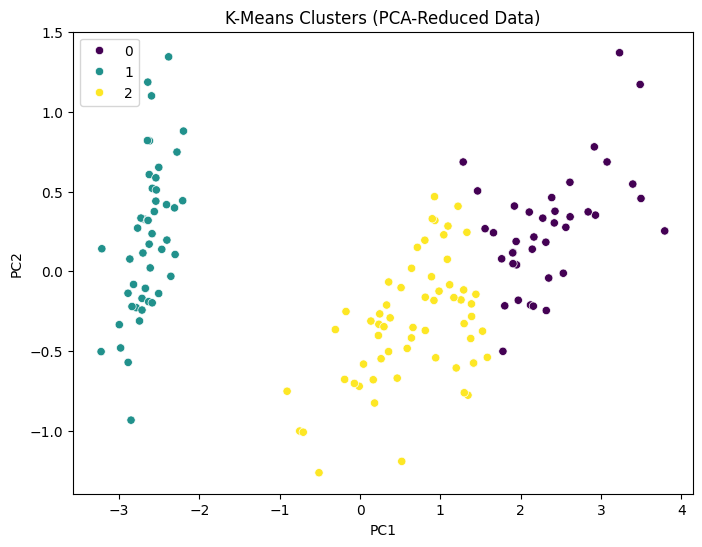

In [12]:
model = KMeans(n_clusters=3, random_state=42)
labels = model.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=labels, data=df_pca, palette='viridis', legend='full')
plt.title("K-Means Clusters (PCA-Reduced Data)")
plt.show()


In [13]:
print("K-Means Results:")
print(results_kmeans_no)

print("Hierarchical Results:")
print(results_hier_no)

print("Mean-Shift Results:")
print(results_ms_no)


K-Means Results:
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.550964         560.366004        0.666391
1         4    0.497412         528.166420        0.754473
2         5    0.488518         494.094382        0.806241
Hierarchical Results:
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.554097         556.841122        0.656604
1         4    0.488740         513.772164        0.795602
2         5    0.484155         487.070341        0.820687
Mean-Shift Results:
   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         3    0.685482         508.882183        0.389291
1         4    0.685482         508.882183        0.389291
2         5    0.685482         508.882183        0.389291
